In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
business=pd.read_csv('business(1).csv')
pd.DataFrame(business)


,Alcohol_beer_and_wine,Alcohol_full_bar,Alcohol_none,Ambience casual_ False,Ambience casual_ True,Ambience classy_ False,Ambience classy_ True,Ambience hipster_ False,Ambience hipster_ True,Ambience intimate_ False,...,RestaurantsReservations_False,RestaurantsReservations_True,RestaurantsTableService_False,RestaurantsTableService_True,RestaurantsTakeOut_False,RestaurantsTakeOut_True,WiFi_free,WiFi_no,WiFi_paid,stars
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,4.0
1,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,1,0,4.5
2,1,0,0,1,0,1,0,1,0,1,...,0,1,0,1,1,0,1,0,0,4.0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,2.0
4,0,0,1,0,1,1,0,1,0,1,...,1,0,1,0,0,1,0,1,0,2.5
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1.5
6,0,1,0,1,0,1,0,1,0,1,...,0,1,0,1,0,1,0,1,0,4.0
7,0,1,0,0,1,1,0,1,0,1,...,1,0,1,0,0,1,0,1,0,4.0
8,0,1,0,1,0,1,0,1,0,1,...,0,1,0,1,0,1,0,1,0,3.5
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.5


In [4]:
# business['stars'].replace([1.0,1.5,2.0,2.5,3.0,3.5],0,inplace=True)
# business['stars'].replace([4,4.0,4.5,5],1,inplace=True)

X= pd.DataFrame(business.drop('stars', axis=1).values)
y= business['stars'].values

feature_cols = business.columns[0:77]
print(feature_cols)

Index(['Alcohol_beer_and_wine', 'Alcohol_full_bar', 'Alcohol_none',
       'Ambience casual_ False', 'Ambience casual_ True',
       'Ambience classy_ False', 'Ambience classy_ True',
       'Ambience hipster_ False', 'Ambience hipster_ True',
       'Ambience intimate_ False', 'Ambience intimate_ True',
       'Ambience touristy_ False', 'Ambience touristy_ True',
       'Ambience trendy_ False', 'Ambience trendy_ True',
       'Ambience upscale_ False', 'Ambience upscale_ True',
       'Ambienceromantic_ False', 'Ambienceromantic_ True',
       'BikeParking_False', 'BikeParking_True',
       'BusinessAcceptsCreditCards_False', 'BusinessAcceptsCreditCards_True',
       'BusinessParking lot_ False', 'BusinessParking lot_ True',
       'BusinessParking street_ False', 'BusinessParking street_ True',
       'BusinessParking valet_ False', 'BusinessParking valet_ True',
       'BusinessParking validated_ False', 'BusinessParking validated_ True',
       'BusinessParkinggarage_ False', 'Bu

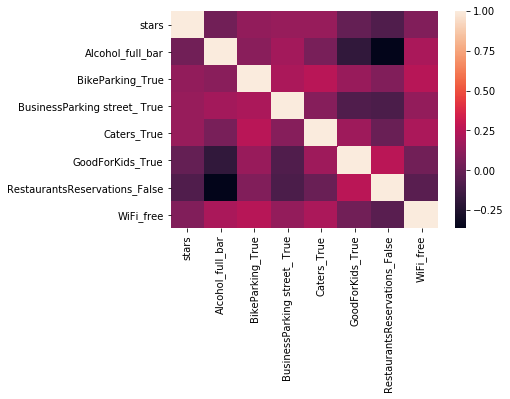

In [5]:
import seaborn as sns
corr_df = business[['stars', 'Alcohol_full_bar', 'BikeParking_True', 'BusinessParking street_ True', 'Caters_True', 'GoodForKids_True','RestaurantsReservations_False','WiFi_free']]
sns.heatmap(corr_df.corr());

In [6]:
#Linear Regression
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred_train = regressor.predict(X_train)
print('Train RMSE:')
print(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

y_pred_test = regressor.predict(X_test)
print('Test RMSE:')
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print ('')
print(regressor.intercept_)
res = pd.DataFrame({'feature': feature_cols, 'coef': regressor.coef_})
print(pd.DataFrame(res.sort_values(by=['coef'], ascending=False)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Train RMSE:
0.7412492567199715
Test RMSE:
0.7572142703112591

3.4353085182042027
                             feature          coef
28       BusinessParking valet_ True  4.047394e+12
27      BusinessParking valet_ False  4.047394e+12
6              Ambience classy_ True  3.362815e+12
5             Ambience classy_ False  3.362815e+12
47         GoodForMealdessert_ False  2.719067e+12
48          GoodForMealdessert_ True  2.719067e+12
42          GoodForMeal dinner_ True  1.824993e+12
41         GoodForMeal dinner_ False  1.824993e+12
24         BusinessParking lot_ True  1.667886e+12
23        BusinessParking lot_ False  1.667886e+12
11          Ambience touristy_ False  1.043504e+12
12           Ambience touristy_ True  1.043504e+12
4              Ambience casual_ True  6.749562e+11
3             Ambience casual_ False  6.749562e+11
40          GoodForMeal brunch_ True  6.163980e+11
39         GoodForMeal brunch_ False  6.163980e+11
10           Ambience intimate_ True  2.212780e+11
9

In [10]:
#Cross Validation

from sklearn.model_selection import KFold, cross_val_score
lr = LinearRegression()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
cross_val_scores = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=kfold)
print('10-fold RMSEs:')
print([np.sqrt(-x) for x in cross_val_scores])
print('CV RMSE:')
print(np.sqrt(-np.mean(cross_val_scores)))  # RMSE is the sqrt of the avg of MSEs
print('Std of CV RMSE:')
print(np.std(cross_val_scores))

print(regressor.intercept_)
res = pd.DataFrame({'feature': feature_cols, 'coef': regressor.coef_})
print(pd.DataFrame(res.sort_values(by=['coef'], ascending=False)))

10-fold RMSEs:
[0.7376264896385099, 0.7534747627960025, 0.7410598543565764, 0.736387835472943, 0.7600223523964008, 0.7342258835840773, 0.7399720340524605, 0.7492238293286, 0.7526578556698972, 0.7547683587490751]
CV RMSE:
0.745991924440831
Std of CV RMSE:
0.012895228941877555
3.4353085182042027
                             feature          coef
28       BusinessParking valet_ True  4.047394e+12
27      BusinessParking valet_ False  4.047394e+12
6              Ambience classy_ True  3.362815e+12
5             Ambience classy_ False  3.362815e+12
47         GoodForMealdessert_ False  2.719067e+12
48          GoodForMealdessert_ True  2.719067e+12
42          GoodForMeal dinner_ True  1.824993e+12
41         GoodForMeal dinner_ False  1.824993e+12
24         BusinessParking lot_ True  1.667886e+12
23        BusinessParking lot_ False  1.667886e+12
11          Ambience touristy_ False  1.043504e+12
12           Ambience touristy_ True  1.043504e+12
4              Ambience casual_ True  6.74

In [7]:
#Ridge CV 

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import RidgeCV


pf = PolynomialFeatures(degree=2,interaction_only=True)
X_pf = pf.fit_transform(X) 

ridge = RidgeCV(store_cv_values=True)
ridge.fit(X, y)

ridge_MSEs = ridge.cv_values_
print('Ridge CV RMSE:')
print(np.sqrt(np.mean(ridge_MSEs)))


ridge_pf = RidgeCV(store_cv_values=True)
ridge_pf.fit(X_pf, y)

ridge_pf_MSEs = ridge_pf.cv_values_
print('Ridge PF CV RMSE:')
print(np.sqrt(np.mean(ridge_pf_MSEs)))

Ridge CV RMSE:
0.7458908459319094
Ridge PF CV RMSE:
0.7289958883334875


RMSE:
0.7803914157243039

Test RMSE:
0.7572142703112591


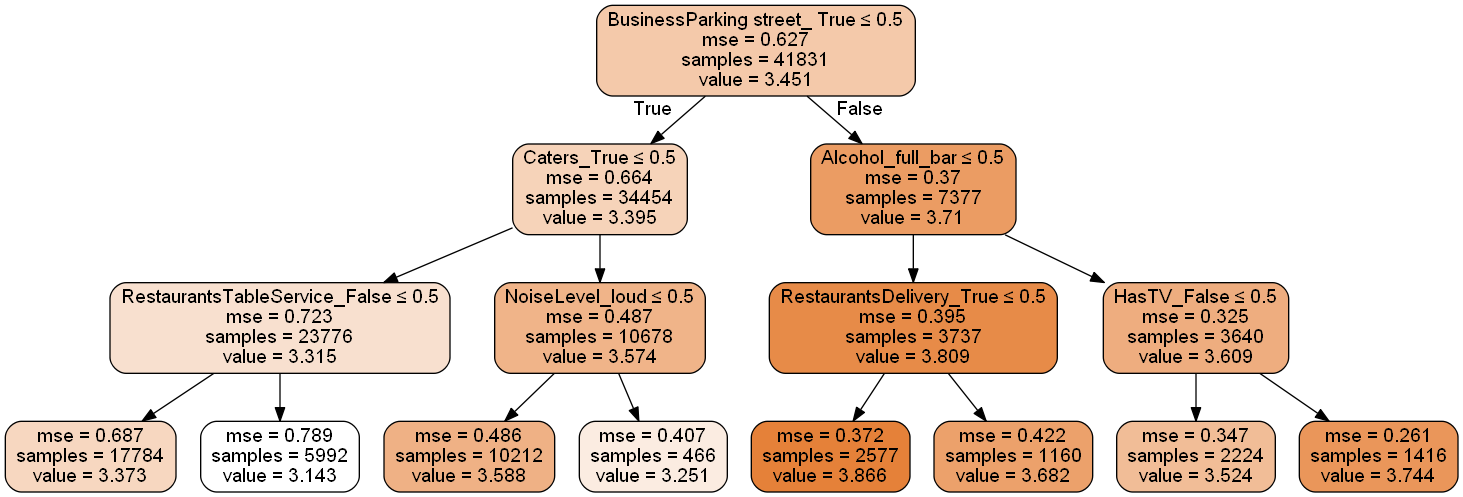

In [8]:
#Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

regressor=DecisionTreeRegressor(max_depth=3,random_state=1)
regressor.fit(X_train,y_train)

y_pred=regressor.predict(X)

print('RMSE:')
print(np.sqrt(metrics.mean_squared_error(y_test, regressor.predict(X_test))))
print('')
print('Test RMSE:')
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

dot_data = StringIO()  
export_graphviz(regressor, out_file=dot_data,  
                    feature_names=feature_cols,  
                    filled=True, rounded=True,  
                    special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [9]:
pd.DataFrame({'feature': feature_cols, 'importance': regressor.feature_importances_}).sort_values(by='importance', ascending=False).head(5)

,feature,importance
26,BusinessParking street_ True,0.395462
34,Caters_True,0.322624
70,RestaurantsTableService_False,0.155524
1,Alcohol_full_bar,0.048029
52,NoiseLevel_loud,0.033251


In [10]:
#SVR
from sklearn.svm import SVR

regressor=SVR(kernel='rbf')
regressor.fit(X_train,y_train)

y_pred=regressor.predict(X)

print('RMSE:')
print(np.sqrt(metrics.mean_squared_error(y_test, regressor.predict(X_test))))
print('')

print('Test RMSE:')
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))


RMSE:
0.7360020615112289

Test RMSE:
0.7572142703112591


In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

reg_models = [('LinReg', LinearRegression(), {'normalize': [True, False]}),
              ('DecTreeReg', DecisionTreeRegressor(), {'max_depth': range(2, 10, 2), 'max_features': [0.25, 0.5, 0.75, 1.0]}),
              ('Lasso', Lasso(), {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}),
              ('Ridge', Ridge(), {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}),
              ('ElasticNet', ElasticNet(), {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}),
              ('SVR', SVR(), {'C': [1e0, 1e1, 1e2, 1e3], 'gamma': np.logspace(-2, 2, 5)})]

names = []
params = []
results = []
for name, model, param in reg_models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=1)
    reg_grid = GridSearchCV(model, param, cv=kfold, scoring='neg_mean_squared_error')
    reg_grid.fit(X, y)
    best_model = reg_grid.best_estimator_
    names.append(name)
    params.append(reg_grid.best_params_)
    results.append(np.sqrt(-reg_grid.best_score_)) 

result_df = pd.DataFrame({'models': names, 'results': results})
result_df.columns = ['models', 'RMSE']
result_df.sort_values(by='RMSE', ascending=False, inplace=True)
print(result_df.tail(1))

sns.barplot(x='models', y='RMSE', data=result_df)